# The Adventure of Sherlock's Craven Women and Tenacious Men:
## Examing the Langauge of Gender Construction in a Selection of Sir Arthur Conan Doyle's _Sherlock Holmes_

## Aubrey Ross

In [1]:
# Import all your libraries here, and only here, please.

import nltk
from nltk import word_tokenize as tokenize, pos_tag, pos_tag_sents, ngrams
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import numpy as np
from nltk.text import Text
%matplotlib inline 

from wordcloud import WordCloud, STOPWORDS



# Don't remove this line. It's necessary for the wordcount function 
# below to work. 
from IPython.nbformat import current

# This is to make your plots a little bigger.
# You may adjust this, but be careful of making your plots too big or too small.
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 8]

/Users/aubreyjean/anaconda3/lib/python3.6/site-packages/IPython/nbformat.py:13: ShimWarning: The `IPython.nbformat` package has been deprecated since IPython 4.0. You should import from nbformat instead.
  "You should import from nbformat instead.", ShimWarning)
/Users/aubreyjean/anaconda3/lib/python3.6/site-packages/nbformat/current.py:19: UserWarning: nbformat.current is deprecated.

- use nbformat for read/write/validate public API
- use nbformat.vX directly to composing notebooks of a particular version

  """)


## Introduction: 
The most well know detective in literary history is that of Sherlock Holmes. Sir Arthur Conan Doyle's _The Complete Collection of Sherlock Holmes_ is comprised of 56 short stories, four novels and contains of hundreds of distinct characters. Written in the late nineteenth and early twentieth-century, the narratives in Doyle’s _Holmes_ canon reflect the Victorian gender norms of that in both actions and description. Computational tools and analysis can be utilized to explore and examine the methods by which Doyle constructed gender in his work. Specifically, I want to examine the language Doyle employed when describing female and male characters and how those terms may or may not reflect socially constructed Victorian gender norms.

In order to accomplish my analysis, I choose ten stories from the _Sherlock Holmes_ canon. The corpora were evenly divided between stories with female lead characters and stories with male lead characters. I chose the corpora in this way to ensure an even split between male and female leads. Had I chose ten stories at random, I ran the chance of having all of them be stories with male lead characters as the majority of the narratives revolve around men. By choosing the corpora in this fashion, I have guaranteed that the women’s corpus and the man’s corpus both contain the same number of narratives far as the major characters are concerned. The five texts with female leads are _The Sign of the Four_, _A Scandal in Bohemia_, _The Speckled Band_, _The Adventure of the Copper Beeches_, and _The The Adventure of the Solitary Cyclist_. The five texts with male leads _The Red-Headed League_, _The Five Orange Pips_, _The Adventure of the Beryl Coronet_, _The Adventure of the Six Napoleons_, and _The Adventure of the Devil's Foot_.

My first iteration of examination was conducting an exploratory analysis. Below are some examples of the type of exploration I conducted. 

## Loading and Splitting the Corpus:

In [3]:
# Creating a variable for the text / Opening and reading the text / checking the length 
holmes= open("The_Complete_Sherlock_Holmes.txt").read()
len(holmes)

3377234

In [4]:
#spliting and looking at how many sections there are
holmes_split= holmes.split("%%%%%")
len(holmes_split)

49

In [5]:
#Splitting the text for 5 stories with female lead characters
sign_of_four= holmes_split[1] 
bohemia= holmes_split[2]
speckled_band= holmes_split[9] 
copper= holmes_split[13]
cycist= holmes_split[28]

#Splitting the text for 5 stories with male lead characters
red_head= holmes_split[3]
orange_pips= holmes_split[6] 
coronet= holmes_split[12]
napoleons= holmes_split[32] 
devils_foot= holmes_split[47]

In [6]:
# Combining all of the stories to one variable for women and one for men 
women = ''.join([sign_of_four, bohemia, speckled_band, copper, cycist])
men = " ".join([red_head, orange_pips, coronet, napoleons, devils_foot])

In [7]:
len(men)

260108

In [8]:
len(women)# Tokenizing
women_tokens = tokenize(women)
men_tokens= tokenize(men)

## Exploratory Analysis: 
For my first iteration of exploration, I chose to make wordclouds for each corpus to examine the types of words used. I wanted to see which words they had in common and which were unique. 

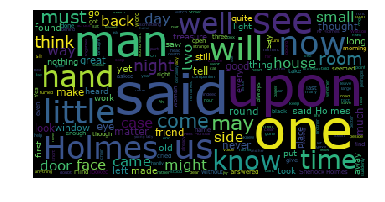

In [9]:
#Creating wordclouds for each corpus for an overview of terms
def generate_wordcloud(text):
    wordcloud = WordCloud(font_path='/Library/Fonts/Verdana.ttf',
                          relative_scaling = 1.0,
                          stopwords = STOPWORDS 
                          ).generate(text)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

generate_wordcloud(women)

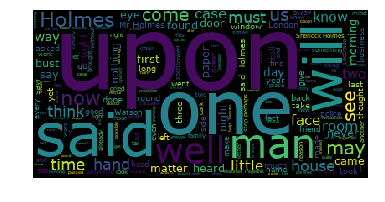

In [10]:
def generate_wordcloud(text): 
    wordcloud = WordCloud(font_path='/Library/Fonts/Verdana.ttf',
                          relative_scaling = 1.0,
                          stopwords = STOPWORDS
                          ).generate(text)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

generate_wordcloud(men)

#### Observations:
Though the word clouds did not reveal much about the adjectives, it is interesting to see how many words the two copora have in common.

# Lexical Dispersion Plots:
For my second iteration I wanted to examine the occurrences of female and male pronouns through each corpus. I was curious to see how often they occur depending on the gender of the lead characters.

In [11]:
#Making a TEXT varriables for Concordance analysis
women_text = Text(women_tokens)
men_text= Text(men_tokens)

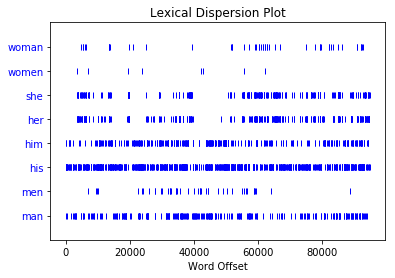

In [12]:
women_text.dispersion_plot(['woman', 'women', "she", "her", "him", "his", "men", "man"])

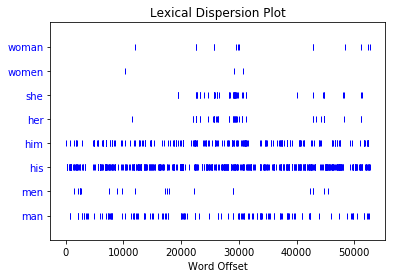

In [13]:
men_text.dispersion_plot(['woman', 'women', "she", "her", "him", "his", "men", "man"])

#### Observations:
The Lexical Dispersion Plots reflects the imbalance of female and male pronouns in both corpora. This finding is intriguing, especially considering that though the _Women's Corpus_ is made of texts with female lead characters there are many more occurences of male pronouns.

# Part of Speech
For my thrid iteration I wanted to compare the different types of adjectives used for each corpus. I was interested in comparing the types of adjectives used in texts and how they may be different if the narrative concerned female or male lead characters. I did this by POS tagging the corpora, counting the POS amounts and the extracting the adjectives. I then looked at the 20 most common adjectives for each

#### Questions to keep in mind: 
What types of adjectives are used? How are they different or similar? How could these adjectives be used in constructing gender?

In [14]:
#POS tagging
women_pos = pos_tag(women_tokens)
men_pos= pos_tag(men_tokens)

In [15]:
#Creating lists for the words and the POSes for each
women_pos_words= [pair[0] for pair in women_pos]
women_pos_pos= [pair[1] for pair in women_pos]

men_pos_words= [pair[0] for pair in men_pos]
men_pos_pos= [pair[1] for pair in men_pos]

In [16]:
# Defining a function to create a list of adjectives for the women's corpus
def get_W_Adj(taggedText): 
    adjectives = []
    for pair in taggedText: 
        word = pair[0]
        pos = pair[1]
        if pos == 'JJ': 
            adjectives.append(word)
    return adjectives

In [17]:
women_adjectives = get_W_Adj(women_pos)

In [18]:
#Looking at the most common adjectives in the women's corpus
women_common_adj = Counter(women_adjectives).most_common(30)
women_common_adj

[('little', 157),
 ('other', 104),
 ('great', 79),
 ('old', 79),
 ('own', 79),
 ('good', 73),
 ('small', 72),
 ('last', 62),
 ('young', 58),
 ('long', 55),
 ('same', 50),
 ('first', 50),
 ('such', 49),
 ('much', 46),
 ('few', 45),
 ('black', 42),
 ('white', 41),
 ('open', 37),
 ('clear', 34),
 ('sure', 33),
 ('dear', 32),
 ('strange', 31),
 ('many', 30),
 ('whole', 29),
 ('large', 28),
 ('right', 27),
 ('short', 26),
 ('dark', 26),
 ('able', 24),
 ('curious', 23)]

In [19]:
# Defining a function to create a list of adjectives for the men's corpus
def get_M_Adj(taggedText): 
    adjectives = []
    for pair in taggedText: 
        word = pair[0]
        pos = pair[1]
        if pos == 'JJ': 
            adjectives.append(word)
    return adjectives

In [20]:
men_adjectives= get_M_Adj(men_pos)

In [21]:
#Looking at the most common adjectives in the women's corpus
men_common_adj= Counter(men_adjectives).most_common(30)
men_common_adj

[('other', 67),
 ('little', 66),
 ('last', 56),
 ('own', 43),
 ('such', 40),
 ('good', 33),
 ('first', 33),
 ('great', 32),
 ('few', 30),
 ('much', 26),
 ('small', 25),
 ('long', 25),
 ('singular', 21),
 ('whole', 21),
 ('possible', 20),
 ('young', 20),
 ('many', 18),
 ('able', 18),
 ('old', 18),
 ('strange', 17),
 ('right', 16),
 ('same', 16),
 ('second', 16),
 ('red', 15),
 ('sure', 15),
 ('clear', 15),
 ('only', 15),
 ('dear', 14),
 ('next', 14),
 ('black', 14)]

#### Observations:
Interestingly, both corpora share similar adjectives. At first glance, the results seem to indicate that come adjective appear more frequently in the _Women’s corpus_, but the _Women’s Corpus_ is much longer, therefore the frequency is off. This exploration still provides useful insight into they types of adjectives used in the corpora.

In [22]:
#Making a TEXT varriables for Concordance analysis
women_text = Text(women_tokens)
men_text= Text(men_tokens)

# Testing Hypothesis: Close Reading with Concordances

After my exploratory analysis I proposed two hypothesis for testing: 

### A) Female characters will be constructed using language which depicts them as delicate, virtuous and/or vulnerable.
### B) Male characters will be constructed using language which depicts them as strong, capable and/or dangerous.

To test my hypotheses I examined the types of adjectives being used in conjunction with gendered nouns using concordances.  To do this, I used the NLTK .Text() function to transfigure the corpora so it could be used with the .concordance() function. Close reading allowed me to examine the words used in conjunction with male and female nouns.

#### Questions to keep in mind: What types of descriptive adjectives are used when referring to women and men? How are they different? Is there a difference in the types of articles utilized when designating a gender ? How are these differences or similarities being used to construct gender?

In [23]:
#Making a TEXT varriables for Concordance analysis
women_text = Text(women_tokens)
men_text= Text(men_tokens)

## Testing Hypothesis A:
I examined which adjectives were used in conjunction with the terms _woman_ and _women_ throughout both corpora.

In [24]:
women_text.concordance("woman")

Displaying 25 of 49 matches:
ring two friends . You are a wronged woman , and shall have justice . Do not br
re crowd . `` What a very attractive woman ! '' I exclaimed , turning to my com
. I assure you that the most winning woman I ever knew was hanged for poisoning
ter which describes her as a wronged woman . What wrong can it refer to except 
 pale . She must have been more than woman if she did not feel some uneasiness 
 , broken whimpering of a frightened woman . `` It is Mrs. Bernstone , '' said 
 '' said Sholto . `` She is the only woman in the house . Wait here . I shall b
culiar way . We could see a tall old woman admit him , and sway with pleasure a
t-hand side of the passage . The old woman was pacing up and down with a scared
r herself , a middle-aged , graceful woman , and it gave me joy to see how tend
'' I said , `` to a child or a small woman . '' `` Apart from their size , thou
, followed by a stoutish , red-faced woman with a large sponge in her hand . ``
ary , as tr

In [25]:
women_text.concordance("woman")

Displaying 25 of 49 matches:
ring two friends . You are a wronged woman , and shall have justice . Do not br
re crowd . `` What a very attractive woman ! '' I exclaimed , turning to my com
. I assure you that the most winning woman I ever knew was hanged for poisoning
ter which describes her as a wronged woman . What wrong can it refer to except 
 pale . She must have been more than woman if she did not feel some uneasiness 
 , broken whimpering of a frightened woman . `` It is Mrs. Bernstone , '' said 
 '' said Sholto . `` She is the only woman in the house . Wait here . I shall b
culiar way . We could see a tall old woman admit him , and sway with pleasure a
t-hand side of the passage . The old woman was pacing up and down with a scared
r herself , a middle-aged , graceful woman , and it gave me joy to see how tend
'' I said , `` to a child or a small woman . '' `` Apart from their size , thou
, followed by a stoutish , red-faced woman with a large sponge in her hand . ``
ary , as tr

In [26]:
men_text.concordance("woman")

Displaying 14 of 14 matches:
- three times by men , and once by a woman . '' `` But what is that compared wi
 , thinks my little Mary , who has a woman 's quick insight into character . ``
 as tender and quiet and gentle as a woman could be . She is my right hand . I 
 ever seen such deadly paleness in a woman 's face . Her lips , too , were bloo
riking in her as she was evidently a woman of strong character , with immense c
n without a horrible exposure of the woman whom he loved . But the instant that
the far side of the kitchen door , a woman had stood and talked with a man , wh
at they had been disturbed , for the woman had run back swiftly to the door , a
 them . All three of them , the dead woman and the two demented men , retained 
horror can be which has frightened a woman to death and two strong men out of t
o , since in the first case only the woman , who had presumably the more sensit
he bust and face of a very beautiful woman . Holmes stooped over it . `` Brenda
r. Holmes .

In [27]:
men_text.concordance("women")

Displaying 3 of 3 matches:
he motive was ? '' `` Had there been women in the house , I should have suspect
t that she loved you , but there are women in whom the love of a lover extingui
being a man of evil reputation among women . It must have been he who wore thos


#### Observations:
#### Adjectives to note:
- angelic fashion of women
- slatternly
- bediamonded
- wronged woman(occurs twice)
- lovely
- graceful
- attractive (most os the adjectives are aesthetic)

Interesting line: “Women are never to be entirely trusted”

#### Results:
The adjectives used when referring to female nouns are mostly aethetic and denote chaste and vulnerable characteristics, which supports the hypothesis. Most interesting is that the article used when referring to women is mostly _a_, an indefinite article. _The_, a definite article, is used somewhat consistently when referring to men. This is a small but significant syntactic difference! 

## Testing Hypothesis B:
I examined which adjectives were used in conjunction with the terms _man_ and _men_ throughout both corpora.

In [28]:
women_text.concordance("man") 

Displaying 25 of 245 matches:
 my companion which made him the last man with whom one would care to take anyt
comrade to another , but as a medical man to one for whose constitution he is t
, that some murder has been done by a man who was smoking an Indian lunkah , it
rd you say that it is difficult for a man to have any object in daily use witho
I . `` Anything else ? '' `` He was a man of untidy habits , -- very untidy and
 it is no great feat to assume that a man who treats a fifty-guinea watch so ca
atch so cavalierly must be a careless man . Neither is it a very far-fetched in
t a very far-fetched inference that a man who inherits one article of such valu
here the key has slipped . What sober man 's key could have scored those groove
 London , S.W . Date , July 7 . Hum ! Man 's thumb-mark on corner , -- probably
pes at sixpence a packet . Particular man in his stationery . No address . 'Be 
-- yes , why , Dr. Watson is the very man . Your correspondent says two friends
urance-mon

In [29]:
men_text.concordance("men") 

Displaying 24 of 24 matches:
ely nominal services . All red-headed men who are sound in body and mind and ab
cancy on the League of the Red-headed Men . It 's worth quite a little fortune 
ere are more vacancies than there are men , so that the trustees are at their w
heard of the League of the Red-headed Men ? ' he asked with his eyes open . `` 
d a great sympathy for all red-headed men ; so when he died it was found that h
st to the providing of easy berths to men whose hair is of that colour . From a
there would be millions of red-headed men who would apply . ' `` 'Not so many a
 confined to Londoners , and to grown men . This American had started from Lond
mes in animated conversation with two men , one of whom I recognised as Peter J
oose our positions . These are daring men , and though we shall take them at a 
is coat-tails . '' `` There are three men waiting for him at the door , '' said
n beaten four times -- three times by men , and once by a woman . '' `` But wha
y strong re

In [30]:
men_text.concordance("man") 

Displaying 25 of 123 matches:
 his knee , I took a good look at the man and endeavoured , after the fashion o
here was nothing remarkable about the man save his blazing red head , and the e
 Mr. Wilson , that I was a red-headed man . ' `` 'Why that ? ' I asks . `` 'Why
s worth quite a little fortune to any man who gets it , and I understand that t
Mr. Holmes , I am a very stay-at-home man , and as my business came to me inste
atter I stood as good a chance as any man that I had ever met . Vincent Spauldi
north , south , east , and west every man who had a shade of red in his hair ha
deal table , behind which sat a small man with a head that was even redder than
wever , when our turn came the little man was much more favourable to me than t
 noble benefactor . Are you a married man , Mr. Wilson ? Have you a family ? ' 
e must stretch a point in favour of a man with such a head of hair as yours . W
, I knew that my assistant was a good man , and that he would see to anything t
 No . 4 . 

In [31]:
men_text.concordance("men") 

Displaying 24 of 24 matches:
ely nominal services . All red-headed men who are sound in body and mind and ab
cancy on the League of the Red-headed Men . It 's worth quite a little fortune 
ere are more vacancies than there are men , so that the trustees are at their w
heard of the League of the Red-headed Men ? ' he asked with his eyes open . `` 
d a great sympathy for all red-headed men ; so when he died it was found that h
st to the providing of easy berths to men whose hair is of that colour . From a
there would be millions of red-headed men who would apply . ' `` 'Not so many a
 confined to Londoners , and to grown men . This American had started from Lond
mes in animated conversation with two men , one of whom I recognised as Peter J
oose our positions . These are daring men , and though we shall take them at a 
is coat-tails . '' `` There are three men waiting for him at the door , '' said
n beaten four times -- three times by men , and once by a woman . '' `` But wha
y strong re

#### Observations:

#### Adjectives to note: 
- demented
- gentle
- strong
- daring
- dangerous
- smartest
- wonderful
- remarkable
- formidable

#### Results:
Unlike the results of Hypothesis A, the adjectives used to describe _man_ in refer more to physicality and nonaesthetic descriptions. The adjectives also denote strength and capability, which supportsd Hypotesis B.
The _Men's Corpus_ has fewer instances of the terms woman and women. This may be significant because the _Women's_ corpus had a fairly even distribution of female and male pronouns. This finding is concurrent.
Also signigicant is the use of an indefinite article when referring to female charcters is also present in the _Men's Corpus_.


# Argument and Discussion:
Literature is often considered a reflection of the world and the people who inhabit it. In the case of Sir Arthur Conan Doyle, that world consisted of conformity to Victorian-era social norms of femininity and masculinity in late nineteenth century London (“Gender Roles of Victorian Era for Men and Women”). The language in _Sherlock Holmes_ used to construct female characters assumes long held socially constructed gender norms which potentially constrained the range and capabilities of female characters. As the results of Hypothesis A suggested, the adjectives applied to female characters were typically aesthetic. Terms like _young_, _attractive_, and beautiful frequently occurred in reference to women characters.  Other terms such as _graceful_, _lovely_, and _wronged_ denote chaste and vulnerable characteristics which were celebrated as positive and necessary attributions for women in the Victorian-era  (“Gender Roles of Victorian Era for Men and Women”). 

More significantly, the results of the concordances illustrated the differences in articles used regarding female and male characters. The results of both hypotheses indicate the frequency in which female gendered nouns, such as _woman_, were preceded by the indefinite article _a_, while male gendered nouns were preceded by the definite article _the_. Though this may superficially seem like a simple semantic observation, the consistent use of an indefinite article when referring to female characters inadvertently takes away the character’s agency and capacity. When a female character is referred to as _a_ woman as opposed to _the_ women, that character becomes more ambiguous and less significant, effectively taking away her influence and authority.

Looking at the corpora straightforwardly, on would assume it was merely the aesthetic description of women versus the physicalization of men. However, the computational analysis revealed a minute syntactical level gender distortion rather than merely a descriptive one. 

These findings are an example of the way popular culture was utilized in portraying constructing and advancing gender norms. The popularity of Doyle’s novel, as well as that of his contemporaries, contributed in advancing ideal gender roles and behavior to the public. In as much as the same way the popular movies and television continue to do so in the modern age, Doyle’s portrayal of gender norms acted as both a reflection of those archetypes while also promoting them. It is important to acknowledge how novels, movies and other forms of media culture function as not only an observation of socially constructed norms and values, but also contribute to them.

# Limitations and Next Steps:
The scale and timeframe for this research were limited, which constrained the possibility of more in-depth examination. Also, more sophisticated coding is needed for a more in-depth analysis of the corpus in its entirety. Given more time and more experience, this research could continue to examine how language was used to construct gender throughout the entire canon of _Sherlock Holmes_. For instance, it is necessary to look at how language was used regarding the specific characters as well as pronouns. There is a wealth of possibility to examine the use of language in constructing gender in this data set moving forward.

### Citations:
“Gender Roles of Victorian Era for Men and Women.” Victorian Era Upper Class: Men and Women's Life, www.victorian-era.org/gender-roles-of-victorian-era.html. Accessed 09 Aug., 2018

Corpora Sourced from: Ender, Christoph. “The Complete Sherlock Holmes.” The Complete Sherlock Holmes Canon,
Christoph Ender, https://sherlock-holm.es/. Accessed: 23 July, 2018